In [1]:
import numpy as np

data = np.array([100, 113, 110, 85, 105, 102, 86, 63, 81, 101, 94, 106, 101, 79, 94, 90, 97])
change_per_day = np.delete(data, 0) - np.delete(data, len(data)-1)


In [2]:
change_per_day

array([ 13,  -3, -25,  20,  -3, -16, -23,  18,  20,  -7,  12,  -5, -22,
        15,  -4,   7])

In [3]:
def cross_value(array, start_index, end_index, m):
    #moving towards right
    cum_sum = 0 #cumulative sum = 0
    right_max = -np.inf
    for index in np.arange(m, end_index + 1):
        cum_sum += array[index]
        if cum_sum > right_max:
            right_max = cum_sum #max cumulative value
            right_idx = index #index at which cumulative value becomes maximum
        
    #moving towards left
    cum_sum = 0
    left_max = -np.inf
    for index in np.arange(m-1, start_index - 1, -1):
        cum_sum += array[index]
        if cum_sum > left_max:
            left_max = cum_sum #max cumulative value
            left_idx = index #index at which cumulative value becomes maximum
    
    cross = right_max + left_max
    si = left_idx
    ei = right_idx
    
    return (cross, si, ei)

#start_index = 0 and end_index = len(array) - 1
def maximum_subarray(array, start_index, end_index):
    if (end_index - start_index) >= 1:
        m = int(np.ceil((start_index + end_index)/2))
        maximum_L, si_l, ei_l = maximum_subarray(array, start_index = start_index, end_index = m-1) #array[m] is not included
        maximum_R, si_r, ei_r = maximum_subarray(array, start_index = m, end_index = end_index) #array[m] is include
        
    if (end_index - start_index) == 0:
        maximum = array[start_index]
        si = start_index
        ei = end_index
        return(maximum, si, ei)
    
    else:   
        left = [maximum_L, si_l, ei_l]
        right = [maximum_R, si_r, ei_r]
        cross, si, ei = cross_value(array, start_index, end_index, m)
        cross_v = [cross, si, ei]

        combined = [left, right, cross_v]
        combined_value = [left[0], right[0], cross_v[0]]

        maximum_value_index = combined_value.index(max(combined_value))
        return combined[maximum_value_index]

    

In [4]:
# change_per_day = [5,-6,2,-10,13,1]
maximum_value, si, ei = maximum_subarray(change_per_day, 0, len(change_per_day) - 1)
print(f'So the maximum benefit we can get is {maximum_value} buying at day {si + 1} and selling at day {ei + 1}')
#si + 1 and ei + 1 is done to get the original index of the data

So the maximum benefit we can get is 43 buying at day 8 and selling at day 11


### Now lets compare the practical and theoretical complexity

In [5]:
import time

loopcount = 1000
start = np.zeros(loopcount)
end = np.zeros(loopcount)
for i in np.arange(loopcount):
    start[i] = time.time()
    maximum_subarray(change_per_day, 0, len(change_per_day) - 1)
    end[i] = time.time()



In [6]:
print(f'Averaging {loopcount} samples.')
print(f'Total Time taken to execute data of size n = {len(change_per_day)} is {np.mean(end-start)} seconds.')

Averaging 1000 samples.
Total Time taken to execute data of size n = 16 is 0.0004094812870025635 seconds.


In [7]:
import time
import math

def practical_time(loopcount, array):
    start = np.zeros(loopcount)
    end = np.zeros(loopcount)
    for i in np.arange(loopcount):
        start[i] = time.time()
        maximum_subarray(array, 0, len(array) - 1)
        end[i] = time.time()
    timetaken = np.mean(end-start)
    return timetaken

def theoritical_time(array, c):
    n = len(array)
    t = n * math.log2(n) * c
    return t



In [8]:
import matplotlib.pyplot as plt

arraysize = 4000 #max size of n
loopcount = 10 #averaging multiple time periods on same operation for better result
c = 1/550000
array = []
nsize = []
time_p = []
time_t = []
for i in np.arange(arraysize):
    array.append(i)
    if i%50==0:
        time_p.append(practical_time(loopcount, array))
        time_t.append(theoritical_time(array, c))
        nsize.append(len(array))


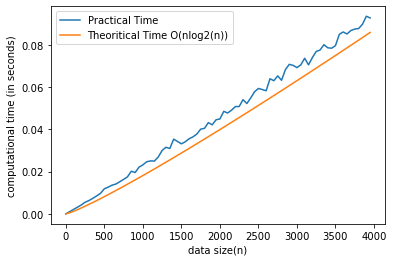

In [9]:
plt.figure()
plt.plot(nsize, time_p, label='Practical Time')
plt.plot(nsize, time_t, label='Theoritical Time O(nlog2(n))')
plt.xlabel('data size(n)')
plt.ylabel('computational time (in seconds)')
plt.legend()

plt.show()
    

The plot of the practical computational time and the theoritical compututational time seems to align, not perfectly though, which may be because of the value of 'c' that I have chosen which depends upon the computer computational power. I have chosen c to be 1/550000 to align with the theoritical curve with the practical one.

The zigzag in the Practical Time plot is because of the effect of other processes that the cpu is processing at that moment. To solve that, looping over the algorithm over the same n and averaging all of them (I personally think taking the minimum will be a better idea). And another important analysis from the curve plot is that both seems to be growing at the same way.

Another thing is that, the plot differs every time I execute from the start, that is because of the other processes that is running on the system during that particular time affecting the time performance on our algorithm.